In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from DLCore.LoadUCF101 import  LoadlUCF101_OnsetAligned
from DLCore.classifiers.tcnn import *
from DLCore.data_utils import get_CIFAR10_data
from DLCore.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from DLCore.layers import *
from DLCore.fast_layers import *
from DLCore.solver import Solver


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# Load the UCF101 Data
DataDir='/media/sadegh/Linux2/UCF101/'

MinFrames=50
FrameStride=1
MinTrainingPerClass=70
Height=80
Width=112
CategoryFilter='Workout'

data =  LoadlUCF101_OnsetAligned(DataDir,MinFrames,FrameStride,MinTrainingPerClass,Height,Width,CategoryFilter)

TypeError: slice indices must be integers or None or have an __index__ method

Number of Classes: 13.0
X_train (910, 50, 3, 80, 112)
X_val (453, 50, 3, 80, 112)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


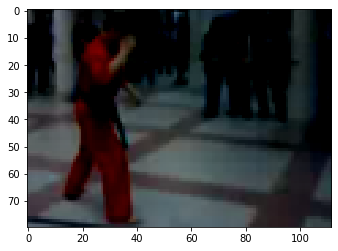

In [3]:
print('Number of Classes:', max(y_train)+1)
print('X_train',X_train.shape)
print('X_val',X_val.shape)
plt.imshow(X_train[10,0,[2,1,0],:,:].transpose(1,2,0))

In [4]:
np.random.seed(231)

    
model = ThreeLayerTemporalConvNet(input_dim=(Nframe,3, 80, 112), num_filters=8,num_Tfilters=16, filter_size=7,
                 hidden_dim=20, num_classes=13, weight_scale=1e-2, reg=1e-4,dropout=0.2,
                 dtype=np.float32)



In [ ]:
from cs231n.classifiers.tcnn import *
solver = Solver(model, data,
                num_epochs=100, batch_size=100,
                update_rule='adam',
                num_train_samples=200,
                optim_config={
                  'learning_rate': 1e-4,
                },
                verbose=True, print_every=5)
solver.train()

(Iteration 1 / 900) loss: 2.565153
(Epoch 0 / 100) train acc: 0.085000; val_acc: 0.094923
(Iteration 6 / 900) loss: 2.565084
(Epoch 1 / 100) train acc: 0.045000; val_acc: 0.094923
(Iteration 11 / 900) loss: 2.565136
(Iteration 16 / 900) loss: 2.565126
(Epoch 2 / 100) train acc: 0.090000; val_acc: 0.057395
(Iteration 21 / 900) loss: 2.565117
(Iteration 26 / 900) loss: 2.565139
(Epoch 3 / 100) train acc: 0.100000; val_acc: 0.057395
(Iteration 31 / 900) loss: 2.565066
(Iteration 36 / 900) loss: 2.565019
(Epoch 4 / 100) train acc: 0.055000; val_acc: 0.057395
(Iteration 41 / 900) loss: 2.565063
(Epoch 5 / 100) train acc: 0.075000; val_acc: 0.057395
(Iteration 46 / 900) loss: 2.565031
(Iteration 51 / 900) loss: 2.565006
(Epoch 6 / 100) train acc: 0.080000; val_acc: 0.057395


Plotting the loss, training accuracy, and validation accuracy should show clear overfitting:

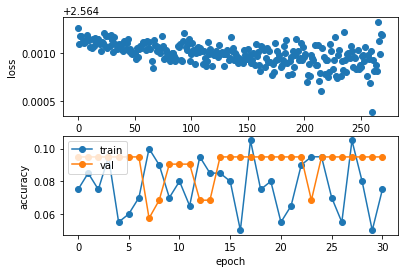

In [12]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

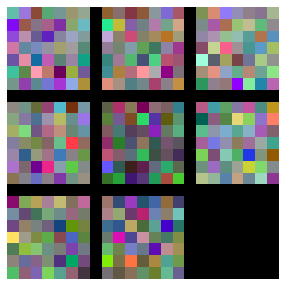

In [10]:
#Visualize Filters
from cs231n.vis_utils import visualize_grid

grid = visualize_grid(model.params['W1'].transpose(0, 2, 3, 1)[:,:,:,[2,1,0]])
plt.imshow(grid.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()

In [35]:
filters = model.params['W2']
plt.plot(filters[16,:])
plt.show()

IndexError: index 16 is out of bounds for axis 0 with size 16

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Class is  Drumming   27
Correct Class is  PlayingFlute   62


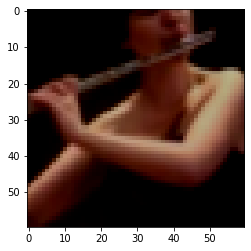

In [186]:
sample=575
y_pred = np.argmax(model.loss(X_val[sample][None,:]))
print("Predicted Class is ",list (ClassDict.keys())[ViableClasses[y_pred]-1]," ",ViableClasses[y_pred] )
print("Correct Class is ",list (ClassDict.keys())[ViableClasses[int(y_val[sample])]-1]," ",ViableClasses[int(y_val[sample])])
plt.imshow(X_val[sample,8,[2,1,0],:,:].transpose(1,2,0)+0.2)

In [21]:
N=len(y_val) 
batch_size=30
num_batches = N // batch_size
if N % batch_size != 0:
    num_batches += 1
y_pred = []
for i in range(num_batches):
    start = i * batch_size
    end = (i + 1) * batch_size
    scores = model.loss(X_val[start:end])
    y_pred.append(np.argmax(scores, axis=1))
y_pred = np.hstack(y_pred)
for i in range(22):
    acc= sum(y_pred[y_val==i]==i) / sum(y_val==i)
    print(list(ClassDict.keys())[ViableClasses[i]-1],ViableClasses[i],":",acc)


BenchPress 10 : 0.7741935483870968
CleanAndJerk 21 : 0.12121212121212122
HandstandPushups 37 : 0.0
JumpRope 48 : 0.18421052631578946
Lunges 52 : 0.0
Nunchucks 56 : 0.3142857142857143
SoccerJuggling 84 : 0.48717948717948717
WallPushups 99 : 0.22580645161290322


/home/sadegh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


IndexError: list index out of range